In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [55]:
df_charging = pd.read_pickle("data/charging_modified.pkl")
df_exploration = df_charging.set_index('connectionTime')

### 1) Hourly Sum of Time without Charging

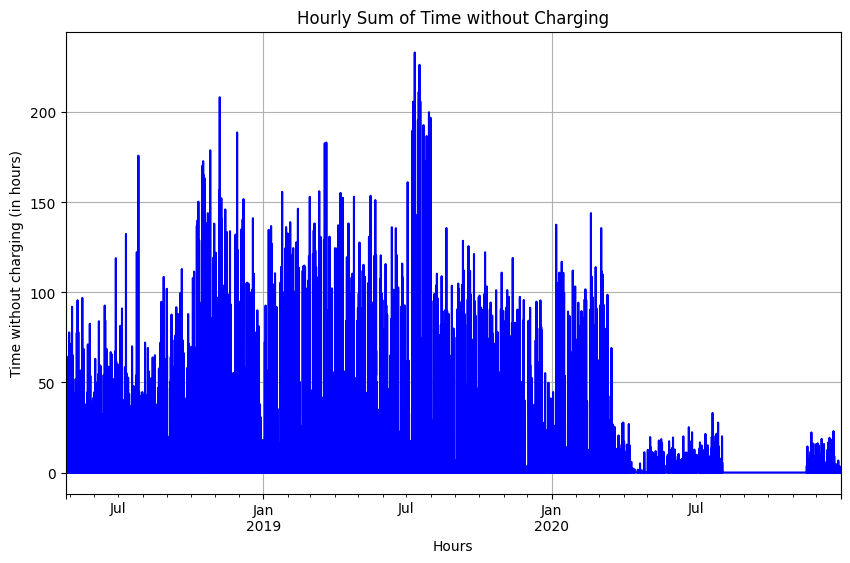

In [56]:
# Plot the hourly sum of time without charging
exploration_hourly = df_exploration['NoChargingTimeHours'].resample('H').sum()
plt.figure(figsize=(10, 6))
#plt.plot(df_charging['kWhDelivered'], linestyle='-', color='b')
exploration_hourly.plot(kind='line', linestyle='-', color='b')
#plt.plot(df_charging.index, df_charging['kWhDelivered'])
plt.title('Hourly Sum of Time without Charging')
plt.xlabel('Hours')
plt.ylabel('Time without charging (in hours)')
plt.grid(True)
plt.show()

In [57]:
df_exploration['NoChargingTimeHours'].resample('H').sum()

connectionTime
2018-04-25 13:00:00+00:00    16.417222
2018-04-25 14:00:00+00:00    24.501389
2018-04-25 15:00:00+00:00    79.513611
2018-04-25 16:00:00+00:00    23.122222
2018-04-25 17:00:00+00:00     6.821667
                               ...    
2020-12-31 14:00:00+00:00     0.000000
2020-12-31 15:00:00+00:00     0.000000
2020-12-31 16:00:00+00:00     0.001389
2020-12-31 17:00:00+00:00     0.000000
2020-12-31 18:00:00+00:00     0.058333
Freq: H, Name: NoChargingTimeHours, Length: 23550, dtype: float64

### 2) Hourly Sum of Charging Time

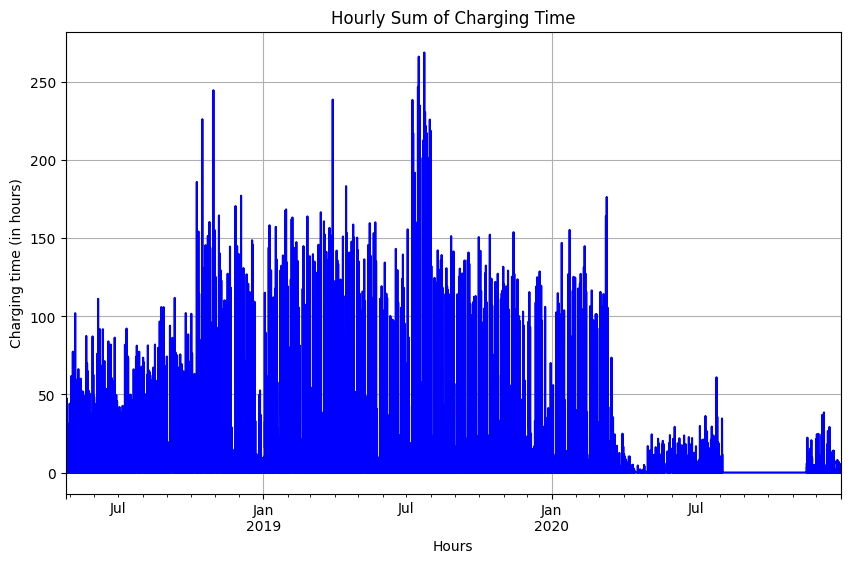

In [58]:
# Plot the hourly sum of charging time
exploration_hourly = df_exploration['ChargingTimeHours'].resample('H').sum()
plt.figure(figsize=(10, 6))
#plt.plot(df_charging['kWhDelivered'], linestyle='-', color='b')
exploration_hourly.plot(kind='line', linestyle='-', color='b')
#plt.plot(df_charging.index, df_charging['kWhDelivered'])
plt.title('Hourly Sum of Charging Time')
plt.xlabel('Hours')
plt.ylabel('Charging time (in hours)')
plt.grid(True)
plt.show()

In [59]:
df_exploration['ChargingTimeHours'].resample('H').sum()

connectionTime
2018-04-25 13:00:00+00:00     4.083056
2018-04-25 14:00:00+00:00    11.548333
2018-04-25 15:00:00+00:00    31.389444
2018-04-25 16:00:00+00:00    34.324722
2018-04-25 17:00:00+00:00     2.254167
                               ...    
2020-12-31 14:00:00+00:00     0.000000
2020-12-31 15:00:00+00:00     0.000000
2020-12-31 16:00:00+00:00     0.761111
2020-12-31 17:00:00+00:00     0.000000
2020-12-31 18:00:00+00:00     3.382222
Freq: H, Name: ChargingTimeHours, Length: 23550, dtype: float64

### 3) Hourly Sum of kWh Delivered

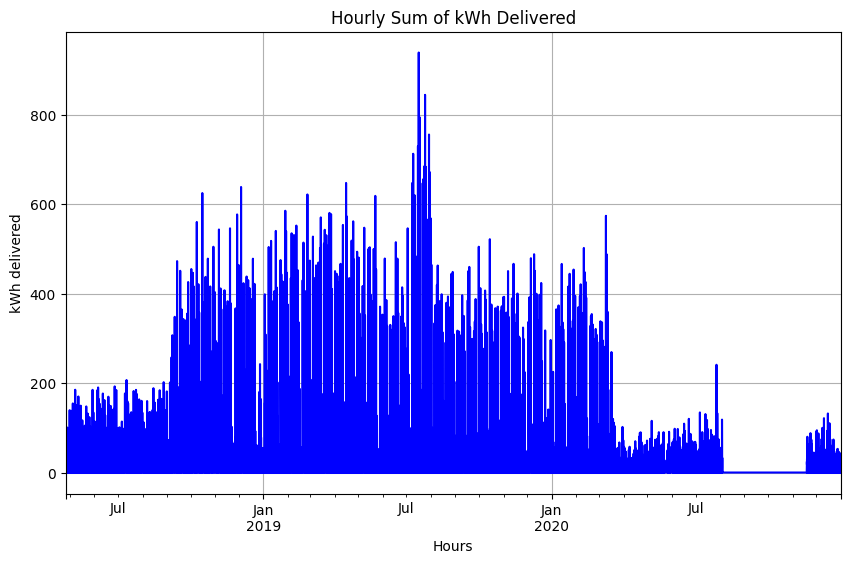

In [60]:
# Plot the hourly sum of kWh delivered
exploration_hourly = df_exploration['kWhDelivered'].resample('H').sum()
plt.figure(figsize=(10, 6))
#plt.plot(df_charging['kWhDelivered'], linestyle='-', color='b')
exploration_hourly.plot(kind='line', linestyle='-', color='b')
#plt.plot(df_charging.index, df_charging['kWhDelivered'])
plt.title('Hourly Sum of kWh Delivered')
plt.xlabel('Hours')
plt.ylabel('kWh delivered')
plt.grid(True)
plt.show()

In [61]:
df_exploration['kWhDelivered'].resample('H').sum()

connectionTime
2018-04-25 13:00:00+00:00    15.270
2018-04-25 14:00:00+00:00    45.453
2018-04-25 15:00:00+00:00    67.066
2018-04-25 16:00:00+00:00    98.398
2018-04-25 17:00:00+00:00     5.070
                              ...  
2020-12-31 14:00:00+00:00     0.000
2020-12-31 15:00:00+00:00     0.000
2020-12-31 16:00:00+00:00    30.192
2020-12-31 17:00:00+00:00    20.526
2020-12-31 18:00:00+00:00    10.571
Freq: H, Name: kWhDelivered, Length: 23550, dtype: float64

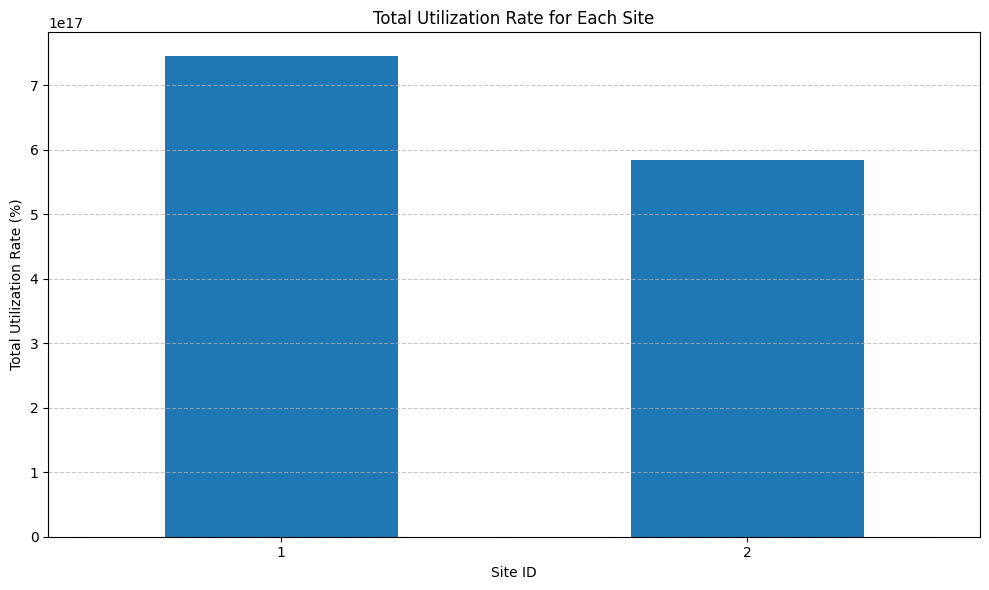

In [69]:


# Total charging time for each station
total_charging_time_per_station = 2 * 24  # 2 possibilities * 24 hours 

# Calculate total operational hours for each station
df_charging['TotalOperationalHours'] = (df_charging['disconnectTime'] - df_charging['connectionTime']).dt.total_seconds() / 3600

# Calculate utilization rate for each station
df_charging['UtilizationRate'] = (df_charging['ChargingTime'] / total_charging_time_per_station) * 100

# Group by siteID and calculate total utilization rate for each site
total_utilization_rate_per_site = df_charging.groupby('siteID')['UtilizationRate'].sum()

# Plot the total utilization rate for each site
plt.figure(figsize=(10, 6))
total_utilization_rate_per_site.plot(kind='bar')
plt.title('Total Utilization Rate for Each Site')
plt.xlabel('Site ID')
plt.ylabel('Total Utilization Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


34565     0
34566     1
34567     1
34568     3
34569     3
         ..
34713    23
34714    23
34715    23
34716    23
34717    23
Name: Hour, Length: 153, dtype: int32
Hour  siteID
0     2            75.850000
1     2           146.583333
3     1           220.166667
4     2           207.916667
5     2           476.033333
12    1          2045.666667
13    1         11065.666667
14    1         11850.000000
      2           228.016667
15    2          2024.466667
16    2          2496.316667
17    2           248.783333
18    2           645.216667
19    1           717.166667
20    1           326.733333
      2           300.766667
21    1          1103.066667
      2           182.350000
22    1          1193.366667
23    1           147.466667
      2           160.233333
Name: ChargingTime, dtype: float64
6000
Hour  siteID
0     2           1.264167
1     2           2.443056
3     1           3.669444
4     2           3.465278
5     2           7.933889
12    1          34.

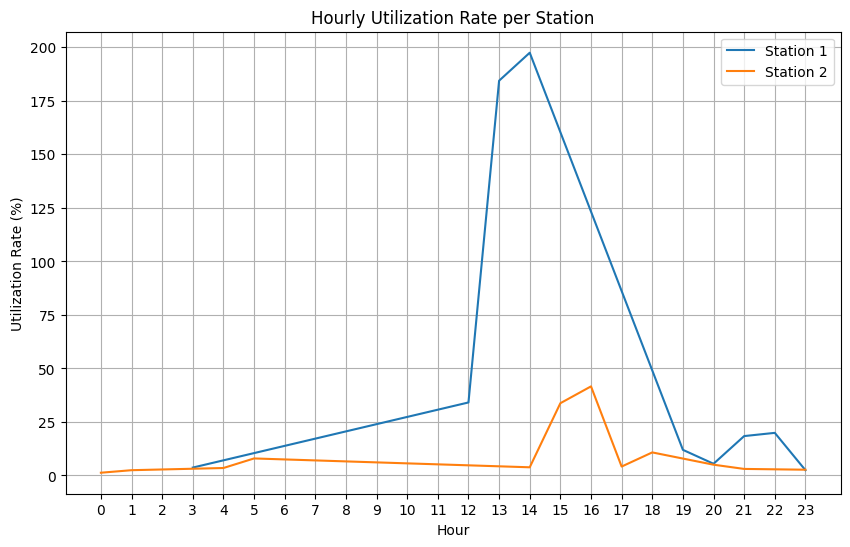

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the day you want to visualize (e.g., "2019-07-18")
specific_day = "2019-07-18"

# Convert specific_day to datetime
specific_day = pd.to_datetime(specific_day).date()

# Filter data for the specific day
df_specific_day = df_charging[pd.to_datetime(df_charging['connectionTime']).dt.date == specific_day].copy()  # Make a copy

# Check if there is any data available for the specific day
if df_specific_day.empty:
    print(f"No data available for {specific_day}")
else:
    # Calculate the hour of the connection time
    df_specific_day['Hour'] = df_specific_day['connectionTime'].dt.hour
    print(df_specific_day['Hour'])
    # Calculate the charging duration in each hour for each station
    hourly_charging_duration_per_station = df_specific_day.groupby(['Hour', 'siteID'])['ChargingTime'].sum()

    # Calculate the total possible charging time per station in each hour
    #total_possible_charging_time_per_station = (2*50) # 2 possibilities per station
    # Calculate the total possible charging time per station in each hour
    total_possible_charging_time_per_station = 120 * 50 # 120 Minuten
    total_seconds = hourly_charging_duration_per_station.dt.total_seconds()

    # Convert total seconds to minutes
    total_minutes = total_seconds / 60  # 60 seconds in a minute
    # Calculate the utilization rate for each station in each hour
    # hourly_utilization_rate_per_station = (hourly_charging_duration_per_station / total_possible_charging_time_per_station) * 100
    # Calculate the utilization rate for each station in each hour
    hourly_utilization_rate_per_station = (total_minutes / total_possible_charging_time_per_station) *100  # 24 Stunden * 60 Minuten

    # Convert total seconds to minutes
    print(total_minutes)
    print(total_possible_charging_time_per_station)
    print(hourly_utilization_rate_per_station)

# Plot the utilization rate per station and hour
plt.figure(figsize=(10, 6))

# Iterate over each station
for station_id, data in hourly_utilization_rate_per_station.groupby(level='siteID'):
    plt.plot(data.index.get_level_values('Hour'), data.values, label=f'Station {station_id}')

plt.title('Hourly Utilization Rate per Station')
plt.xlabel('Hour')
plt.ylabel('Utilization Rate (%)')
plt.xticks(range(24))  # Set ticks for each hour
plt.legend()
plt.grid(True)
plt.show()


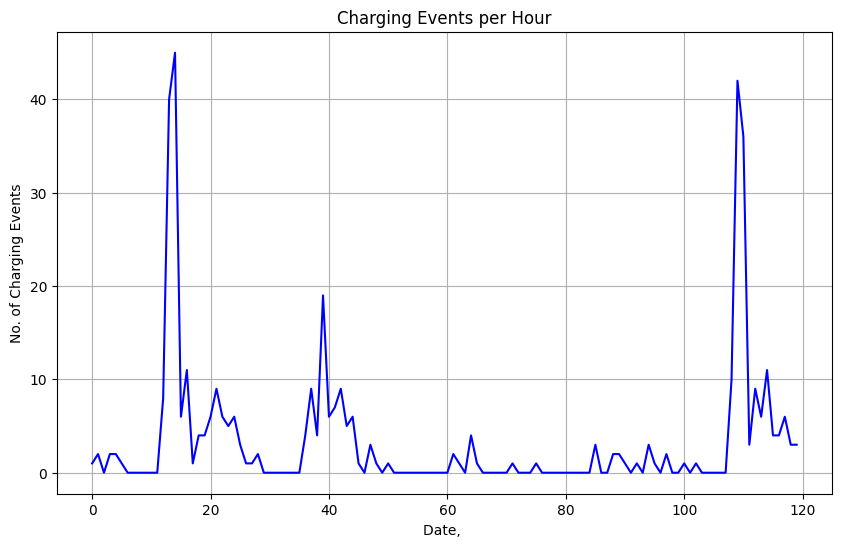

In [80]:
filtered_df = df_exploration.loc['2019-07-18': '2019-07-22']
filtered_df = filtered_df.resample('H')['id'].count().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['id'], linestyle='-', color='b')
plt.title('Charging Events per Hour')
plt.xlabel('Date, ')
plt.ylabel('No. of Charging Events')
plt.grid(True)
plt.show()